# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


#Analysis

1. Temperature increases as you move closer to the equator. 
2. Windspeed is very steady around the world. 
3. Latitude doesn't really affect cloudiness and 

In [1]:
# Dependencies and Setup
import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from scipy.stats import linregress
from api_keys import weather_api_key
from pprint import pprint

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

api_key = '2c3350772f4baf0077349d60ffb2855d'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

631


In [74]:
city_test = ['Toronto', 'Paris', 'Corona Virus', 'Bern', 'Vienna', 'John', 'Dunsk', 'San Francisco', 
             'Jamaica','Rio', 'London', 'Tokyo']

#Find url to extract api from owm website
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="

#Create Empty List and set value at city count
city_test_list = []
city_number=1

#Include a print log of each city as it'sbeing processed (with the city number and city name).
for i in city_test:
    city_url = base_url + i
    response_test= requests.get(city_url).json()

    try:
        city_test_list.append(response_test['name'])
        print(f"Processing record {city_number} of|{i}")
        city_number +=1
        
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass

Processing record 1 of|Toronto
Processing record 2 of|Paris
City not found.  Skipping..
Processing record 3 of|Bern
Processing record 4 of|Vienna
Processing record 5 of|John
City not found.  Skipping..
Processing record 6 of|San Francisco
Processing record 7 of|Jamaica
Processing record 8 of|Rio
Processing record 9 of|London
Processing record 10 of|Tokyo


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
### Perform API Calls
#Perform a weather check on each city using a series of successive API calls.

#Perform a quick test by coming up with a list of cities with successive API calls.  
#Also, I included a list of towns and random names to test if the try & except test works before running API calls of a  list of 500+ cites. 

# Create empty lists for dataframe to plot data
cityname = []
temperature_max = []
cloudiness =[]
humidity=[]
windspeed=[]
latitude=[]
longitude=[]
date=[]
country = []

print("Beginning Data Retrieval")
print("-----------------------------")

# Set value for record and set count
record = 1
set_number = 1

# Loop through the cities in the full cities list to get all the required weather information through API calls.
# Also, to get a print log of all the cities found from calling the API.



for city in cities:
    weather_url = base_url + city
    response= requests.get(weather_url + "&units=imperial").json()

    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_max.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing record {record} of set {set_number}|{city}")
        
        # record and set count
        if record > 49:
            record = 1
            set_number += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass
print("-----------------------------")
print("Data Retrieval Complete") 
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1|ushuaia
Processing record 2 of set 1|saskylakh
City not found.  Skipping..
Processing record 3 of set 1|vardo
Processing record 4 of set 1|ormara
Processing record 5 of set 1|bluff
Processing record 6 of set 1|port alfred
City not found.  Skipping..
Processing record 7 of set 1|severo-kurilsk
Processing record 8 of set 1|punta arenas
Processing record 9 of set 1|acajutla
Processing record 10 of set 1|jamestown
Processing record 11 of set 1|san mateo del mar
Processing record 12 of set 1|ribeira brava
Processing record 13 of set 1|hermanus
Processing record 14 of set 1|albany
Processing record 15 of set 1|thompson
Processing record 16 of set 1|dunedin
Processing record 17 of set 1|busselton
Processing record 18 of set 1|pombas
Processing record 19 of set 1|carauari
Processing record 20 of set 1|vila velha
Processing record 21 of set 1|mataura
Processing record 22 of set 1|urengoy
Processing record 23 of 

Processing record 49 of set 4|martinsville
City not found.  Skipping..
Processing record 50 of set 4|pskov
Processing record 1 of set 5|kirakira
City not found.  Skipping..
Processing record 2 of set 5|saint-joseph
Processing record 3 of set 5|pangnirtung
Processing record 4 of set 5|kavaratti
Processing record 5 of set 5|acapulco
Processing record 6 of set 5|fort dodge
Processing record 7 of set 5|arraial do cabo
Processing record 8 of set 5|ancud
Processing record 9 of set 5|griffith
Processing record 10 of set 5|kysyl-syr
Processing record 11 of set 5|tuatapere
Processing record 12 of set 5|san cristobal
Processing record 13 of set 5|healesville
Processing record 14 of set 5|santiago
Processing record 15 of set 5|voh
Processing record 16 of set 5|siavonga
City not found.  Skipping..
City not found.  Skipping..
Processing record 17 of set 5|abu dhabi
Processing record 18 of set 5|santa maria
Processing record 19 of set 5|fortuna
Processing record 20 of set 5|kailua
Processing record 

Processing record 1 of set 9|grand gaube
Processing record 2 of set 9|vanavara
Processing record 3 of set 9|igrim
Processing record 4 of set 9|grindavik
Processing record 5 of set 9|masterton
Processing record 6 of set 9|corinto
Processing record 7 of set 9|aliwal north
Processing record 8 of set 9|igarka
Processing record 9 of set 9|baruun-urt
Processing record 10 of set 9|narrabri
Processing record 11 of set 9|kirkuk
Processing record 12 of set 9|mabaruma
City not found.  Skipping..
Processing record 13 of set 9|nyirbeltek
Processing record 14 of set 9|san-pedro
Processing record 15 of set 9|hunchun
Processing record 16 of set 9|ambunti
Processing record 17 of set 9|touros
Processing record 18 of set 9|boyolangu
City not found.  Skipping..
Processing record 19 of set 9|los patios
Processing record 20 of set 9|les cayes
Processing record 21 of set 9|klang
Processing record 22 of set 9|bonfim
Processing record 23 of set 9|kenai
Processing record 24 of set 9|san ramon
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:

# create and display data frame 
weather_data = pd.DataFrame({
    'City': cityname,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Latitude': latitude,
    'Longitude': longitude,
    'Max Temperature': temperature_max,
    'Windspeed': windspeed
    
})
weather_data
weather_data.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
count,591.000000,5.910000e+02,591.000000,591.000000,591.000000,591.000000,591.000000
mean,47.050761,1.604803e+09,73.820643,20.811591,19.070541,56.810541,8.480457
std,40.392575,1.705735e+02,19.014133,33.515944,89.898017,22.611140,6.538113
min,0.000000,1.604803e+09,7.000000,-54.800000,-175.200000,-22.720000,0.090000
25%,1.000000,1.604803e+09,64.000000,-7.930000,-60.165000,41.885000,3.880000
50%,40.000000,1.604803e+09,78.000000,25.520000,24.750000,61.450000,6.930000
75%,90.000000,1.604803e+09,88.000000,49.165000,95.250000,75.200000,11.430000
max,100.000000,1.604803e+09,100.000000,78.220000,179.320000,98.440000,59.730000


In [17]:
weather_data.to_csv("Output/weather_data.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

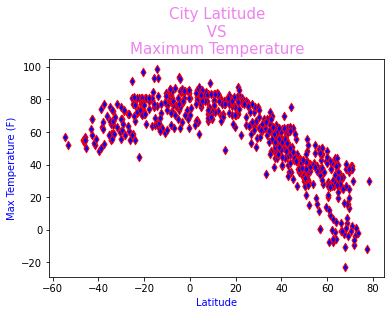

In [48]:
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,7], marker="d", facecolors="blue", edgecolors="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude\n VS \nMaximum Temperature", color='violet').set_fontsize(15) 
plt.xlabel("Latitude", color='blue').set_fontsize(10)
plt.ylabel("Max Temperature (F)", color='blue').set_fontsize(10)


## Latitude vs. Humidity Plot

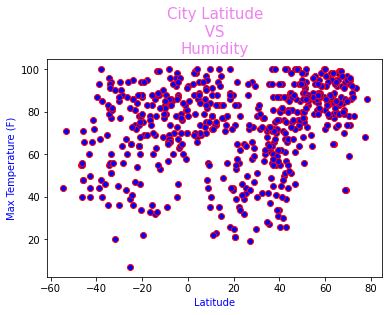

In [47]:
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,4], marker="o", facecolors="blue", edgecolors="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude\n VS \nHumidity", color='violet').set_fontsize(15) 
plt.xlabel("Latitude", color='blue').set_fontsize(10)
plt.ylabel("Max Temperature (F)", color='blue').set_fontsize(10)

## Latitude vs. Cloudiness Plot

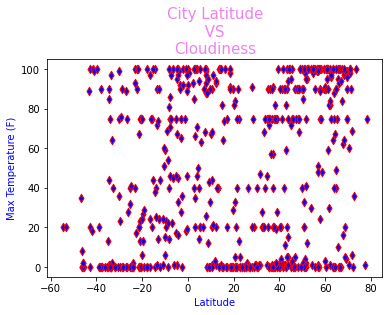

In [45]:
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,1], marker="d", facecolors="blue", edgecolors="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude\n VS \nCloudiness", color='violet').set_fontsize(15) 
plt.xlabel("Latitude", color='blue').set_fontsize(10)
plt.ylabel("Max Temperature (F)", color='blue').set_fontsize(10)

## Latitude vs. Wind Speed Plot

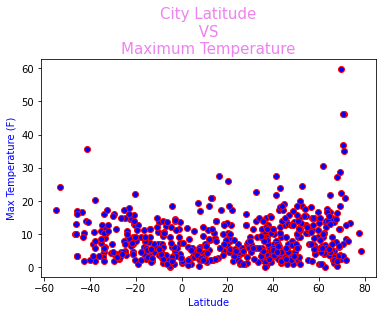

In [10]:
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,8], marker="o", facecolors="blue", edgecolors="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude\n VS \nMaximum Temperature", color='violet').set_fontsize(15) 
plt.xlabel("Latitude", color='blue').set_fontsize(10)
plt.ylabel("Max Temperature (F)", color='blue').set_fontsize(10)

## Linear Regression

In [56]:
northern_hem_data = weather_data[(weather_data["Latitude"] >= 0)]
southern_hem_data = weather_data[(weather_data["Latitude"] < 0)]
northern_hem_data


def linear_regression(x,y):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"r-squared : {round(rvalue,3)}")
    best_fit_plots = x * slope + intercept
    best_fit_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="d", facecolors="green", edgecolors="pink")
    plt.plot(x,best_fit_plots,linewidth = 1,color="purple")
    return best_fit_equation

# Define a fuction for annotating
def annotate(best_fit_equation, a, b):
    plt.annotate(best_fit_equation,(a,b),fontsize=10)










####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared : -0.87


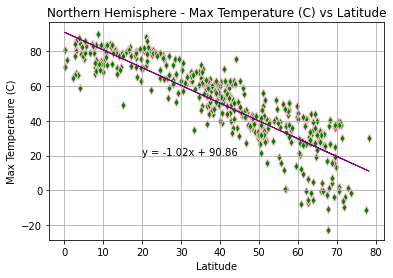

In [59]:
xy = linear_regression(northern_hem_data['Latitude'], northern_hem_data['Max Temperature'])

# add regression formula
plt.annotate(xy,(20,20),color="black")

# Formatting 
plt.title ("Northern Hemisphere - Max Temperature (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_MaxTemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared : 0.623


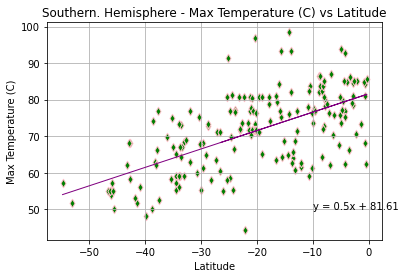

In [61]:
xy = linear_regression(southern_hem_data['Latitude'], southern_hem_data['Max Temperature'])

# add regression formula
plt.annotate(xy,(-10,50),color="black")

# Formatting 
plt.title ("Southern. Hemisphere - Max Temperature (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_MaxTemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared : 0.282


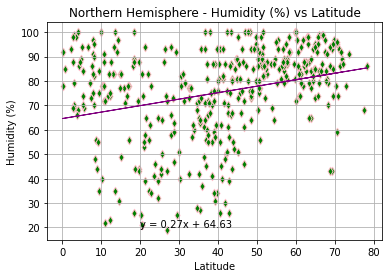

In [62]:
xy = linear_regression(northern_hem_data['Latitude'], northern_hem_data['Humidity'])

# add regression formula
plt.annotate(xy,(20,20),color="black")

# Formatting 
plt.title ("Northern Hemisphere - Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared : 0.251


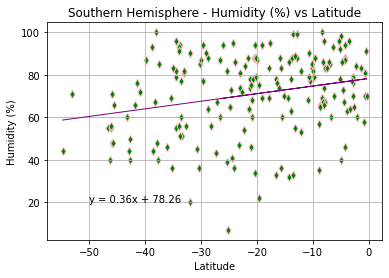

In [65]:
xy = linear_regression(southern_hem_data['Latitude'], southern_hem_data['Humidity'])

# add regression formula
plt.annotate(xy,(-50,20),color="black")

# Formatting 
plt.title ("Southern Hemisphere - Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save plot
plt.savefig("Output/Southern_Hemisphere_Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared : 0.169


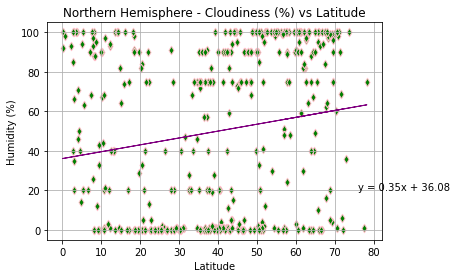

In [68]:
xy = linear_regression(northern_hem_data['Latitude'], northern_hem_data['Cloudiness'])

# add regression formula
plt.annotate(xy,(76,20),color="black")

# Formatting 
plt.title ("Northern Hemisphere - Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared : 0.307


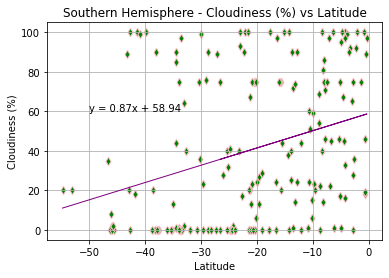

In [70]:
xy = linear_regression(southern_hem_data['Latitude'], southern_hem_data['Cloudiness'])

# add regression formula
plt.annotate(xy,(-50,60),color="black")

# Formatting 
plt.title ("Southern Hemisphere - Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save plot
plt.savefig("Output/Southern_Hemisphere_Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared : 0.253


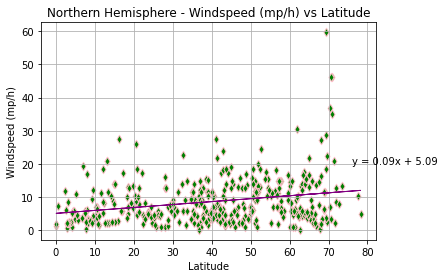

In [71]:
xy = linear_regression(northern_hem_data['Latitude'], northern_hem_data['Windspeed'])

# add regression formula
plt.annotate(xy,(76,20),color="black")

# Formatting 
plt.title ("Northern Hemisphere - Windspeed (mp/h) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mp/h)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_Windspeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared : -0.27


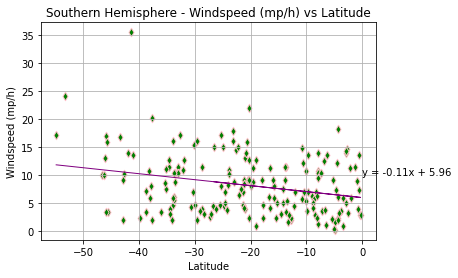

In [73]:
xy = linear_regression(southern_hem_data['Latitude'], southern_hem_data['Windspeed'])

# add regression formula
plt.annotate(xy,(0,10),color="black")

# Formatting 
plt.title ("Southern Hemisphere - Windspeed (mp/h) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mp/h)")
plt.grid()

# Save plot
plt.savefig("Output/Southern_Hemisphere_Windspeed")